In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 데이터 로딩
cust_df = pd.read_csv(
    './santander-customer-satisfaction/train.csv'
    , encoding='latin-1'
)
cust_df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [5]:
cust_df.shape

(76020, 371)

In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
# 레이블의 불균형 확인
cust_df['TARGET'].value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

In [13]:
# 불만족 고객수
unstis_cnt = cust_df[cust_df['TARGET']==1]['TARGET'].count()
# 전체 고객수
tot_cnt = cust_df['TARGET'].count()
print(f'불만족 고객 비율 : {unstis_cnt/tot_cnt:.2f}')

불만족 고객 비율 : 0.04


In [14]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [16]:
cust_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


In [18]:
cust_df.var3.value_counts()[:10]

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: count, dtype: int64

In [19]:
# var3 : -999999 => 2 변환
cust_df['var3'].replace(-999999, 2,inplace=True)
# ID : 고객번호, 만족도 상관이 없다.=> drop
cust_df.drop('ID', axis=1, inplace=True)

In [20]:
# 데이터와 답 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print(f'피처 데이터 shape : {X_features.shape}')

피처 데이터 shape : (76020, 369)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features
    , y_labels
    , test_size=0.2
    , random_state=0
    # , stratify=
)

In [26]:
# 불균형 데이터 셋 확인
# 데이터 분포 비율 확인
train_cnt = y_train.count() # 학습데이터 답의 전체 개수
test_cnt = y_test.count() # 테스트데이터 답의 전체 개수

print(f'학습 세트 Shape : {X_train.shape}, 테스트 세트 Shape : {X_test.shape}')
print('학습데이터 레이블의 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n 테스트데이터 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape : (15204, 369)
학습데이터 레이블의 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트데이터 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [27]:
# 검증 데이터 처리
X_tr, X_val, y_tr, y_val = train_test_split(
      X_train
    , y_train
    , test_size=0.3
    , random_state=0
)

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score # (원래답, 예측확률)
# 모델 오브젝트 생성
xgb_clf = XGBClassifier(
    n_estimators=500
    , learning=0.05
    , random_state=156
)

In [29]:
xgb_clf.fit(
      X_tr
    , y_tr
    , early_stopping_rounds=100
    , eval_metric='auc'
    , eval_set=[(X_tr,y_tr),(X_val,y_val)]
)

[14:16:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learning" } are not used.

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83374	validation_1-auc:0.80818
[2]	validation_0-auc:0.83855	validation_1-auc:0.81008
[3]	validation_0-auc:0.84400	validation_1-auc:0.81515
[4]	validation_0-auc:0.84723	validation_1-auc:0.81543
[5]	validation_0-auc:0.85252	validation_1-auc:0.81729
[6]	validation_0-auc:0.85937	validation_1-auc:0.82418
[7]	validation_0-auc:0.86427	validation_1-auc:0.82763
[8]	validation_0-auc:0.86932	validation_1-auc:0.82938
[9]	validation_0-auc:0.87190	validation_1-auc:0.83084
[10]	validation_0-auc:0.87693	validation_1-auc:0.83024
[11]	validation_0-auc:0.87993	validation_1-auc:0.83020
[12]	validation_0-auc:0.88287	validation_1-auc:0.83066
[13]	validation_0-auc:0.88666	validation_1-auc:0.83068
[14]	validation_0-auc:0.88909	validation_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning=0.05, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [30]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print(f'ROC AUC : {xgb_roc_score}')

ROC AUC : 0.8415464125109068


In [31]:
# 튜닝 : hyperopt
from hyperopt import hp
xgb_search_space = {
      'max_depth':hp.quniform('max_depth',5,15,1)
    , 'min_child_weight' : hp.quniform('min_child_weight',1,6,1)
    , 'colsample_bytree' : hp.uniform('colsample_bytree',0.5,0.95)
    , 'learning_rate' : hp.uniform('learning_rate',0.01,0.2)
}

In [35]:
# STEP 2
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        colsample_bytree=search_space['colsample_bytree'],
        learning_rate=search_space['learning_rate']
    )
    
    roc_auc_list=[]
    
    kf=KFold(n_splits=3)
    for tr_index, val_index  in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        xgb_clf.fit(
              X_tr
            , y_tr
            , early_stopping_rounds=30
            , eval_metric='auc'
            , eval_set=[(X_tr,y_tr),(X_val, y_val)]
            # , cv=3
        )
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,-1])
        roc_auc_list.append(score)
    
    return -1 * np.mean(roc_auc_list)

In [36]:
# STEP 3 : fmin
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(
      fn=objective_func
    , space=xgb_search_space
    , algo=tpe.suggest
    , max_evals=50
    , trials=trials, rstate=np.random.default_rng(seed=30)
)
print(f'BEST : {best}')


[0]	validation_0-auc:0.81678	validation_1-auc:0.79160 
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688 
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572 
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095 
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989 
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978 
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042 
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116 
[8]	validation_0-auc:0.84224	validation_1-auc:0.81135 
[9]	validation_0-auc:0.84515	validation_1-auc:0.81587 
[10]	validation_0-auc:0.84736	validation_1-auc:0.81683
[11]	validation_0-auc:0.84784	validation_1-auc:0.81750
[12]	validation_0-auc:0.84909	validation_1-auc:0.81925
[13]	validation_0-auc:0.84984	validation_1-auc:0.82003
[14]	validation_0-auc:0.85307	validation_1-auc:0.82285
[15]	validation_0-auc:0.85493	validation_1-auc:0.82363
[16]	validation_0-auc:0.85640	validation_1-auc:0.82444
[17]	validation_0-auc:0.85791	validation_1-auc:0.82505
[18]	valid

In [37]:
# STEP 4
xgb_clf = XGBClassifier(
      n_estimators=500
    , learning_rate=round(best['learning_rate'],5)
    , max_depth=int(best['max_depth'])
    , min_child_weight=int(best['min_child_weight'])
    , colsample_bytree=round(best['colsample_bytree'],5)
)

In [38]:
xgb_clf.fit(
      X_tr
    , y_tr
    , early_stopping_rounds=100
    , eval_metric='auc'
    , eval_set=[(X_tr,y_tr),(X_val,y_val)]
)

[0]	validation_0-auc:0.82067	validation_1-auc:0.81347
[1]	validation_0-auc:0.82565	validation_1-auc:0.81743
[2]	validation_0-auc:0.83276	validation_1-auc:0.82626
[3]	validation_0-auc:0.83257	validation_1-auc:0.82441
[4]	validation_0-auc:0.83194	validation_1-auc:0.82344
[5]	validation_0-auc:0.84044	validation_1-auc:0.83237
[6]	validation_0-auc:0.84393	validation_1-auc:0.83321
[7]	validation_0-auc:0.84454	validation_1-auc:0.83373
[8]	validation_0-auc:0.84752	validation_1-auc:0.83772
[9]	validation_0-auc:0.84800	validation_1-auc:0.83939
[10]	validation_0-auc:0.84651	validation_1-auc:0.83711
[11]	validation_0-auc:0.84645	validation_1-auc:0.83646
[12]	validation_0-auc:0.85029	validation_1-auc:0.84025
[13]	validation_0-auc:0.85221	validation_1-auc:0.84166
[14]	validation_0-auc:0.85338	validation_1-auc:0.84246
[15]	validation_0-auc:0.85426	validation_1-auc:0.84355
[16]	validation_0-auc:0.85625	validation_1-auc:0.84559
[17]	validation_0-auc:0.85659	validation_1-auc:0.84636
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.58026, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1531, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print(f'ROC AUC : {xgb_roc_score:.4f}')

ROC AUC : 0.8217


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

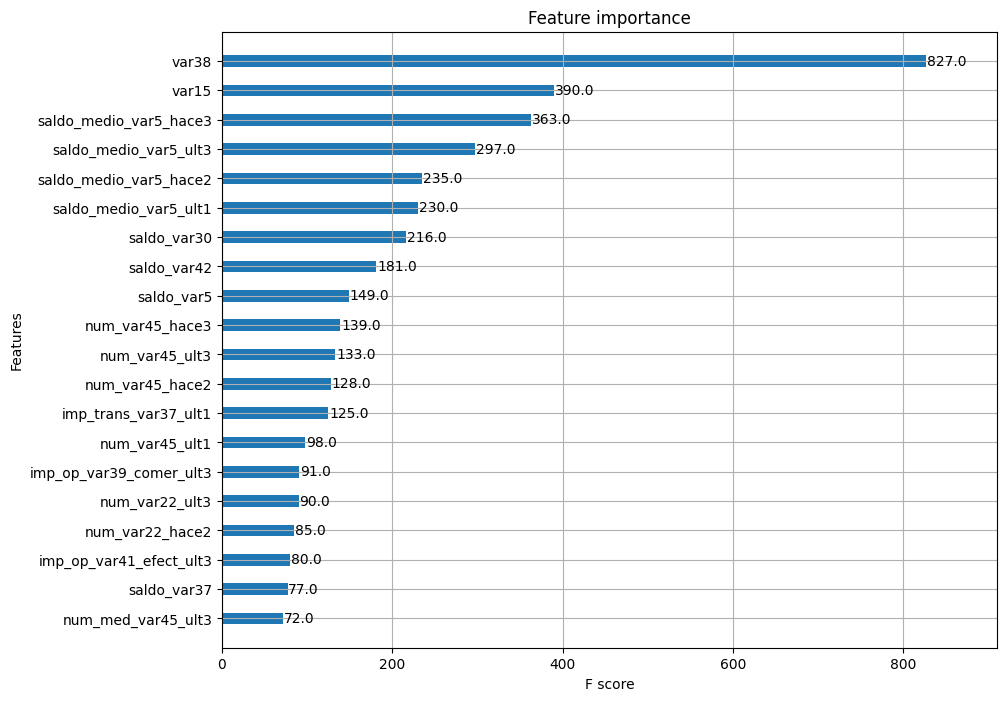

In [41]:
# 피처 중요도 출력
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [42]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr),(X_val,y_val)]
lgbm_clf.fit(
    X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=eval_set
)

[1]	training's auc: 0.826594	training's binary_logloss: 0.154181	valid_1's auc: 0.817934	valid_1's binary_logloss: 0.157506
[2]	training's auc: 0.832651	training's binary_logloss: 0.148605	valid_1's auc: 0.822982	valid_1's binary_logloss: 0.152196
[3]	training's auc: 0.840128	training's binary_logloss: 0.144514	valid_1's auc: 0.829973	valid_1's binary_logloss: 0.148359
[4]	training's auc: 0.844863	training's binary_logloss: 0.141345	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.145572
[5]	training's auc: 0.849989	training's binary_logloss: 0.138589	valid_1's auc: 0.837613	valid_1's binary_logloss: 0.143044
[6]	training's auc: 0.852259	training's binary_logloss: 0.136332	valid_1's auc: 0.839375	valid_1's binary_logloss: 0.140971
[7]	training's auc: 0.854795	training's binary_logloss: 0.134475	valid_1's auc: 0.842141	valid_1's binary_logloss: 0.139234
[8]	training's auc: 0.857144	training's binary_logloss: 0.132812	valid_1's auc: 0.843719	valid_1's binary_logloss: 0.137886
[9]	trai

LGBMClassifier(n_estimators=500)

In [43]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print(f'ROC AUC : {lgbm_roc_score:.4f}')

ROC AUC : 0.8116


In [44]:
lgbm_search_space={
      'num_leaves': hp.quniform('num_leaves',32,64,1)
    , 'max_depth' : hp.quniform('max_depth',100,160,1)
    , 'min_child_samples' : hp.quniform('min_child_samples',60,100,1)
    , 'subsample' : hp.uniform('subsample',0.7,1)
    , 'learning_rate' : hp.uniform('learning_rate',0.01,0.2)
}

In [45]:
# STEP 2
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators=100,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate']
    )
    
    roc_auc_list=[]
    
    kf=KFold(n_splits=3)
    for tr_index, val_index  in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        lgbm_clf.fit(
              X_tr
            , y_tr
            , early_stopping_rounds=30
            , eval_metric='auc'
            , eval_set=[(X_tr,y_tr),(X_val, y_val)]
            # , cv=3
        )
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,-1])
        roc_auc_list.append(score)
    
    return -1 * np.mean(roc_auc_list)

In [ ]:
# STEP 3 : fmin
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(
      fn=objective_func
    , space=lgbm_search_space
    , algo=tpe.suggest
    , max_evals=50
    , trials=trials, rstate=np.random.default_rng(seed=30)
)
print(f'BEST : {best}')


In [49]:
lgbm_clf = LGBMClassifier(
      n_estimators=500
    , num_leaves=int(best['num_leaves'])
    , min_child_samples=int(best['min_child_samples'])
    , subsample=round(best['subsample'],5)
    , learning_rate=round(best['learning_rate'],5)
)

In [50]:
lgbm_clf.fit(
    X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr,y_tr),(X_val,y_val)]
)

[1]	training's auc: 0.829037	training's binary_logloss: 0.155384	valid_1's auc: 0.817169	valid_1's binary_logloss: 0.158585
[2]	training's auc: 0.838386	training's binary_logloss: 0.150173	valid_1's auc: 0.826264	valid_1's binary_logloss: 0.15354
[3]	training's auc: 0.847166	training's binary_logloss: 0.146287	valid_1's auc: 0.836882	valid_1's binary_logloss: 0.149753
[4]	training's auc: 0.851443	training's binary_logloss: 0.143021	valid_1's auc: 0.839508	valid_1's binary_logloss: 0.146776
[5]	training's auc: 0.854378	training's binary_logloss: 0.140391	valid_1's auc: 0.841795	valid_1's binary_logloss: 0.144354
[6]	training's auc: 0.85634	training's binary_logloss: 0.138155	valid_1's auc: 0.843558	valid_1's binary_logloss: 0.142332
[7]	training's auc: 0.858305	training's binary_logloss: 0.136131	valid_1's auc: 0.845726	valid_1's binary_logloss: 0.140504
[8]	training's auc: 0.861424	training's binary_logloss: 0.13453	valid_1's auc: 0.848776	valid_1's binary_logloss: 0.139034
[9]	trainin

LGBMClassifier(learning_rate=0.08592, min_child_samples=69, n_estimators=500,
               num_leaves=41, subsample=0.9149)

In [52]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print(f'ROC AUC : {lgbm_roc_score:.4f}')

ROC AUC : 0.8140
